In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import country_converter

<h1><b>C. Khám phá mối quan hệ trong dữ liệu </b></h1>

### Đọc dữ liệu từ tập tin (file)

Đầu tiên, đọc dữ liệu từ file "clean_movie.csv" và lưu kết quả vào DataFrame df_movie.

In [2]:
df_movie = pd.read_csv('clean_movie.csv',index_col= "Unnamed: 0")
df_movie.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


## 1. Quan hệ trường đơn

#### 1.1 Trường dữ liệu: Genre

**Mục tiêu:** xem tỷ trọng về số lượng phim của các thể loại (chỉ tính các thể loại phim có số lượng trên 100).

**Biểu đồ:** tròn.

**Nguyên nhân:**
- Biểu đồ tròn thể hiện tốt tỷ trọng giữa các thành phần (thể loại phim)

**Cách thực hiện:**

Ta biết rằng 1 phim có thể có nhiều thể loại khác nhau. Ta cần tách các thể loại này sao cho mỗi dòng chỉ là một thể loại, để làm điều này thì ta sẽ chuyển các thể loại sang list và sau đó dùng hàm explode để chia thành các dòng.

In [3]:

#Chia các thể loại thành một List
gen_df = df_movie['Genre'].str.split(', ')
#Mỗi dòng là 1 bộ phim thuộc 1 thể loại
gen_df = gen_df.explode('Genre')

Sau đó, ta sẽ đếm số lượng phim của từng thể loại và lấy ra những thể loại có hơn 100 bộ phim.

In [4]:
#Đếm số lượng phim
gen_df = gen_df.value_counts()
gen_df = gen_df[gen_df>100]

Ta dùng thư viện matplotlib để vẽ biểu đồ tròn.

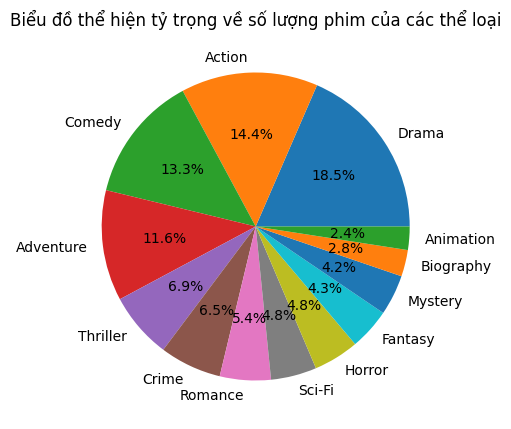

In [5]:
plt.figure(figsize=(14, 5))
plt.pie(gen_df,labels = gen_df.index,autopct='%1.1f%%')
plt.title("Biểu đồ thể hiện tỷ trọng về số lượng phim của các thể loại")
plt.show()

**Nhận xét**
- Các thể loại phim như Action, Drama, Adventure, Comedy chiếu tỷ trọng khá nhiều. Đây là những thể loại phim được nhiều người yêu thích vì tính giải trí của nó rất cao.
- Các thể loại phim như Thriller, Crime, Romance,... chiếm tỷ trọng trung bình. Những thể loại phim này có độ giải trí cũng cao nhưng chỉ phù hợp với một số bộ phận khán giả, không mang tính đại chúng.
- Thể loại phim chiếm tỷ trọng thấp là Biography, nguyên nhân bởi thể loại này mang tính hàn lâm, khá khó xem nên không được sản xuất nhiều. Còn với Animation thì có lẽ do khó làm, cộng với việc thường phục vụ cho nhóm đối tượng là trẻ con (người lớn xem rạp chiếu phim nhiều hơn) nên cũng không được sản xuất nhiều.   

#### Biểu đồ khác 

- Ngoài biểu diễn tỷ trọng theo biểu đồ tròn, ta có thể xem quy mô các bộ phim thông qua biểu đồ cột.

**Mục tiêu:** Xem số lượng phim được sản xuất theo thể loại

**Biểu đồ:** cột

**Nguyên nhân:**
- Thể hiện tốt được số lượng phim của các thể loại.
- So sánh được số lượng phim của các thể loại thông qua chiều dài cột.

**Cách thực hiện:**

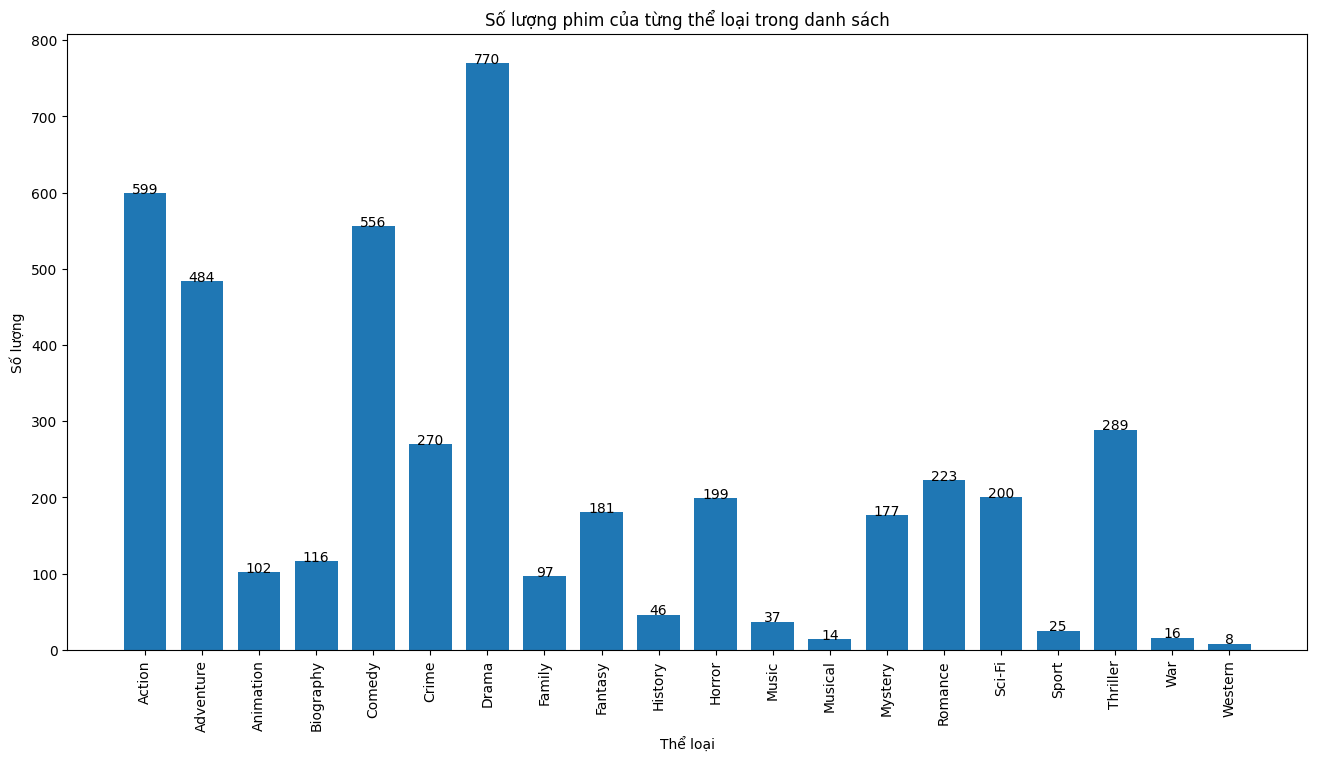

In [6]:

# Hàm ghi số lượng phim từng thể loại lên biểu đồ
def value_label(genres, counts):
    for i in range(len(genres)):
        plt.text(i, counts[i], counts[i], ha = 'center')


genre_arr = np.concatenate(np.array(df_movie["Genre"].str.split(', ')))
unique_genres, value_counts = np.unique(genre_arr, return_counts=True)


# vẽ biểu đồ
plt.figure(figsize=(16,8))
plt.bar(unique_genres, value_counts, align="center", width=0.75 , alpha= 1)
plt.xticks(rotation = 'vertical')
plt.title("Số lượng phim của từng thể loại trong danh sách")
value_label(unique_genres, value_counts)         
plt.ylabel("Số lượng")
plt.xlabel("Thể loại")
plt.rc('font', size=24)
plt.show()

**Nhận xét**
- Qua quan sát, có thể thấy các bộ phim thuộc các thể loại Action, Adventure, Comedy, Drama chiếm số lượng lớn trong danh sách, nhiều nhất là thể loại Drama với 770 bộ phim. Ngược lại, các bộ phim thuộc thể loại Animation, Biography, Family, History, Music, Musical, Sport, War, Western xuất hiện rất ít trong danh sách, ít nhất là Western với 8 bộ phim.

- Do thị hiếu người xem nên các bộ phim thuộc thể loại Action, Drama, Adventure, Comedy được chú trọng về số lượng lẫn chất lượng. Mặt khác, các bộ phim thuộc thể loại Animation, Biography, Family, History, Musical, War, Western khá kén người xem hoặc chỉ phù hợp với một số độ tuổi, đối tượng nhất định nên chưa được chú trọng đầu tư sản xuất, phần đông chất lượng chưa được đánh giá cao, chỉ có một số bộ phim nổi bật được liệt kê vào danh sách.

#### 1.2 Trường dữ liệu Certificate

**Mục tiêu:** Xem số lượng phim được sản xuất theo nhãn

**Biểu đồ:** cột

**Nguyên nhân:**
- Thể hiện tốt được số lượng phim của các nhãn.
- So sánh được số lượng phim của các nhãn thông qua chiều dài cột.

**Cách thực hiện:**

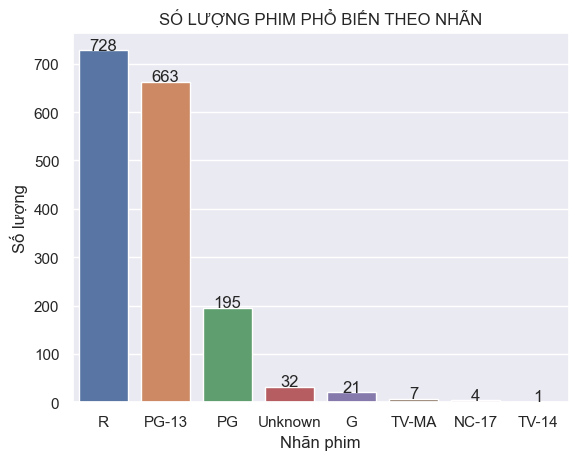

In [7]:
certificate = df_movie['Certificate'].value_counts().reset_index().rename(columns={'index':'Nhãn phim','Certificate':'Số lượng'})

sns.set(style="darkgrid")
ax = sns.barplot(x="Nhãn phim", y="Số lượng", data=certificate)
# Ghi giá trị từng cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.0f}'.format(height),
            ha="center")

ax.set_title('SỐ LƯỢNG PHIM PHỔ BIẾN THEO NHÃN')
ax.set_xlabel('Nhãn phim')
ax.set_ylabel('Số lượng')

plt.show()

**Nhận xét**
- Lựa chọn biểu đồ bar chart để biểu diễn số liệu về tổng lượng phim theo từng loại nhãn, cho thấy những nhãn phim phổ biến nhất.
- Theo như biểu đồ ta thấy, những nhãn phim phổ biến nhất là R, PG-13, PG
    - R (Restricted) – Thanh thiếu niên dưới 17 tuổi không được xem phim nếu không có sự đồng ý của người lớn.
    - PG-13 (Parents Strongly Cautioned) – Phim có một số chi tiết không phù hợp với trẻ dưới 13 tuổi.
    - PG (Parental Guidance Suggested) – Phim có thể có một số chi tiết (hình ảnh, từ ngữ) không phù hợp với trẻ nhỏ. Bố mẹ cần cân nhắc khi cho con cái xem phim.
- Điều này cho thấy những bộ phim phổ biến đa số phù hợp cho lứa tuổi từ 18 tuổi trở lên. Đây cũng là một điều phù hợp vì đây là lứa tuổi có đủ nhận thức để đánh giá, suy nghĩ, đồng thời có năng lực tự chi trả cho nhu cầu giải trí của bản thân. Với những phim khi có đánh giá thu được từ lứa tuổi này cũng thể hiện sự khách quan về chất lượng phim, là nguồn dữ liệu phong phú, nhiều tiềm năng khai thác.

#### 1.3 Trường Country_of_origin

**Mục tiêu:** Coi quy mô sản xuất phim của các quốc gia qua bản đồ

**Biểu đồ:** Choropleth map.

**Nguyên nhân:**
- Giá trị của cột này là các địa điểm địa lý -> có thể biểu diễn trên bản đồ.
- Thông qua các màu sắc (đậm, nhạt), ta sẽ nhận biết được cường độ sản xuất phim của các quốc gia trên thế giới, dễ dàng so sánh và đánh giá về ngành công nghiệp phim của các quốc gia.
- Từ bản đồ, ta có thể hiểu thêm được một số ý nghĩa như các quốc gia chung khu vực thì sản xuất phim như thế nào, khu vực này so với khu vực khác thì ra sao.

**Cách thực hiện:**

Vì một bộ phim có thể được sản xuất bởi nhiều nước, vậy nên ta cần tách các nước này ra theo dòng, mỗi dòng là một nước

In [8]:
df_country = df_movie['Country_of_origin']
df_country = df_country.str.split(', ')
df_temp = df_country.explode('Country_of_origin')


Sau đó, ta đếm số bộ phim sản xuất của các nước bằng hàm value_counts.

Để hiện thị các nước ở trên bản đồ, ta cần phải biết mã số của khu vực nước đó. Để có mã này thì ta sẽ thêm thư viện country_converter, thư viện này sẽ chuyển đổi từ tên của một nước sang mã tương ứng của nước đó (theo mã IS03).

In [9]:
df_country_count = pd.DataFrame(df_temp.value_counts()).reset_index()

df_country_count.columns = ['Country_of_origin','Number of Movie']
df_country_count['Country Code'] = df_country_count['Country_of_origin'].apply(lambda x: country_converter.convert(names=x, to='ISO3', not_found='Unknown'))

Sau đó, ta dùng thư viện plotly để vẽ biểu đồ này

In [10]:
map_film = px.choropleth(df_country_count,
                         locations='Country Code',
                         color = 'Number of Movie')

map_film.show()

Vì đây là biểu đồ động nên không thể ghi lên github hay vào file. Vậy ta sẽ hiển thị tạm ảnh tĩnh của nó.

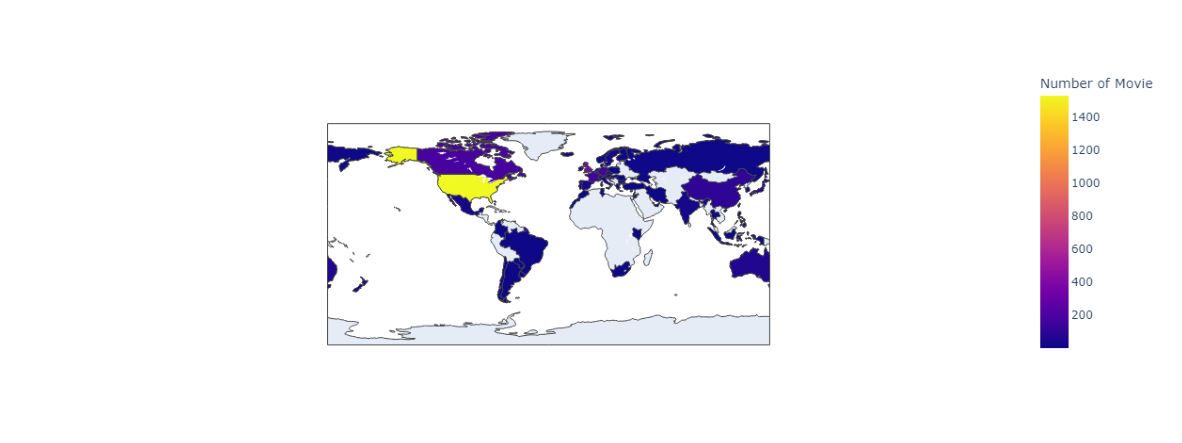

In [49]:
import matplotlib.image as mpimg
image = mpimg.imread("choro.png")
plt.figure(figsize=(15,15))
imgplot = plt.imshow(image)
plt.axis('off')
plt.show()

**Nhận xét**
- Mỹ là nước sản xuất phim nhiều nhất ở trên thế giới, vượt trội hoàn toàn so với những nước khác. Điều này khá là dễ hiểu bởi Mỹ là cường quốc về phim ảnh (nơi có nền công nghiệp điện ảnh lớn nhất và lâu đời nhất). 
- Sau Mỹ thì các quốc gia Châu Âu như Vương quốc Anh, Pháp, Đức, Tây Ban Nha hay Ý cũng có số lượng sản xuất phim khá nhiều. Châu Âu là nơi được coi là cái nôi của nền điện ảnh. Những bộ phim ở Châu Âu thì thường mang tính nghệ thuật nhiều hơn, làm phim cũng không quan tâm nhiều đến doanh thu. Bởi vậy tuy ích hơn Mỹ về số lượng phim nhưng chất lượng phim ở đây vô cùng tốt.
- Ở châu Á thì các quốc gia như Trung Quốc và Nhật Bản sở hữu số lượng phim sản xuất nhiều nhất. Trung Quốc là quốc gia đông dân nhất thế giới nên sở hữu thị trường rất lớn đem về lợi nhuận khủng nên cũng dễ hiểu nếu họ sản xuất nhiều phim. Còn Nhật Bản cũng có một nền công nghiệp phim ảnh lâu đời, cộng với những kịch bản độc đáo, sáng tạo nên thu hút được nhiều người xem -> Sản xuất nhiều phim. 
- Ngoài ra các quốc gia nói tiếng Anh như Canada hay Úc cũng sở hữu ngành công nghiệp phim ảnh lớn với số lượng sản xuất phim cũng khá nhiều. Nguyên nhân có thể là do họ nói tiếng Anh - là ngôn ngữ phổ biến nhất trên thế giới + gần cường quốc về phim như Mỹ hay có văn hoá tương đồng với Mỹ nên được đón nhận nhiều -> Sản xuất phim nhiều

## 2. Quan hệ hai trường

#### 2.1 Trường dữ liệu: Genre, Rating

**Mục tiêu:** Thể hiện được sự phân bố, hình dạng phân bố các mức điểm Rating theo thể loại phim.

**Biểu đồ chọn:** Violin.

**Nguyên nhân:**
- Violin thể hiện tốt được sự phân bố dữ liệu trên một thể loại phim.
- Violin còn thể hiện được hình dạng phân bố.
- So sánh được sự phân bố của điểm trên các thể loại phim

**Cách thực hiện:**

Ta sẽ lấy ra 2 cột Rating và Genre.

Sau đó, vì một phim có thể gồm nhiều Genre, nên ta phải tách mỗi thể loại ra theo dòng.

In [11]:
df_temp = df_movie[['Rating','Genre']]

df_temp['Genre'] = df_temp['Genre'].str.split(', ')
df_temp = df_temp.explode('Genre')

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\3663665284.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vẽ biểu đồ violin

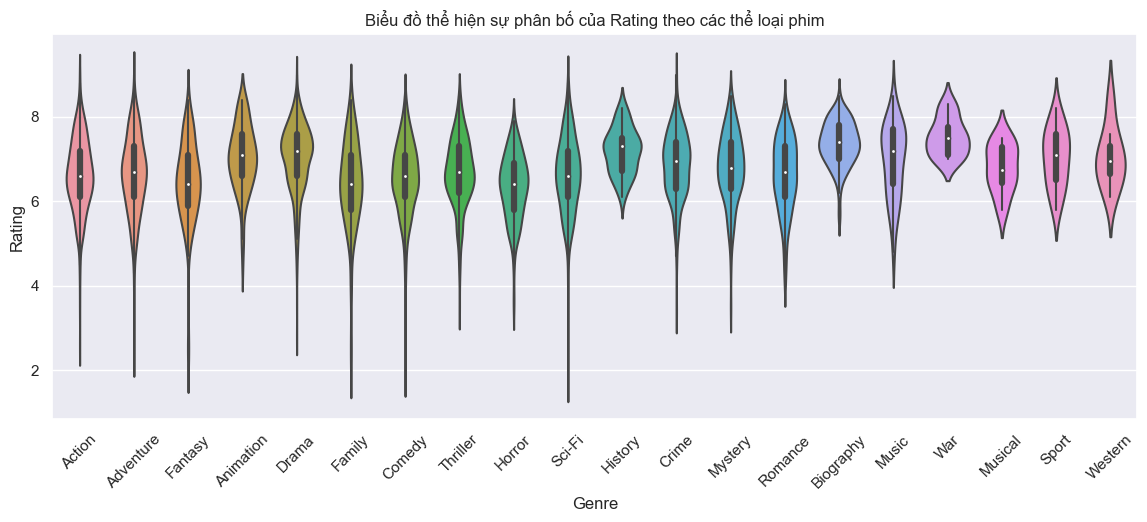

In [12]:
plt.figure(figsize=(14, 5))
sns.violinplot(x="Genre", y="Rating", data=df_temp)
plt.xticks(rotation=45)
plt.title('Biểu đồ thể hiện sự phân bố của Rating theo các thể loại phim')
plt.show()

**Nhận xét**
- Các thể loại phim có khoảng phân bố ngắn như History, Biography, War, Musical, Sport, Western có điểm số tương đối cao, thường là trên 5 đến hơn 8. Nguyên nhân có thể đến từ việc một số thể loại có rất ít phim như  War, Musical, Sport, Western và những phim này được đánh giá cao. Ngoài ra, còn có thể do đặc thù của những thể loại phim này, đó là những thể loại này thường dựa trên một nội dung đã tồn tại và được yêu thích, không phải lên kịch bản nên mức độ rủi ro không quá cao. Cộng với việc nội dung đã được kiểm chứng nên điểm cao cũng khá dễ hiểu.
- Đối với thể loại phim có mức độ phân bố rộng, đây là những thể loại phim được sản xuất rất nhiều, kịch bản của những thể loại phim này thì thường rất đa dạng, có thể sáng tạo hay dựa trên một sự kiện có sẵn. Bởi vậy có những phim rất hay, cũng có những phim vô cùng dở và không được đánh giá cao.
- Và dù có khác nhau, các thể loại đều có sự phân bố tập trung nhiều nhất ở khoảng điểm từ 6-8. Đây có thể coi là khoảng điểm trung bình khá của các bộ phim

#### 2.2 Trường dữ liệu: Income, Rating

**Mục tiêu:** Thể hiện mối quan hệ giữa hai biến Income và Rating để xem sự tương quan của chúng

**Biểu đồ:** Scatter plot

**Nguyên nhân:**
- Dễ nhìn được sự tương quan.
- Đánh giá được xem hai biến có mối liên hệ nào không.
- Quan sát được sự phân tán dữ liệu giữa hai biến.

**Cách thực hiện:**

Lấy ra hai cột Rating và Income

In [13]:
rating_income = df_movie[["Rating", "Income"]]
rating_income

,Rating,Income
0,7.8,2.267947e+09
1,7.6,1.089670e+05
2,7.3,2.392686e+08
4,6.4,1.712539e+08
6,6.1,3.124581e+07
...,...,...
1993,7.5,1.676380e+07
1994,5.4,2.372679e+07
1996,5.5,1.600992e+08
1997,5.8,1.415913e+08


Trực quan bằng biểu đồ scatter

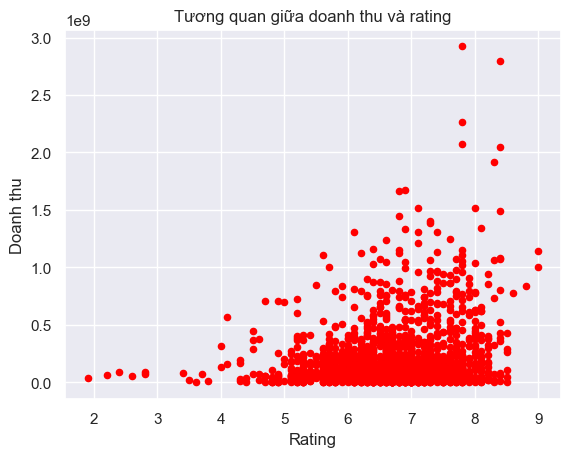

In [14]:
rating_income.plot.scatter('Rating', 'Income', color="Red")
plt.title("Tương quan giữa doanh thu và rating")
plt.xlabel("Rating"), plt.ylabel("Doanh thu")
plt.show()

**Nhận xét**
- Từ biểu đồ trên ta nhận thấy các bộ phim nằm trong top 10 doanh thu có mức điểm rating khá tốt và tốt (tương đương 7 đến 9)
- Các bộ phim có mức điểm đánh giá dưới 5 hầu như là những bộ phim doanh thu thấp.
- Tuy vậy mức rating phổ biến từ 5 đến 8 khi rất nhiều bộ phim doanh thu thấp và cao nằm trong khoảng này.
- Có thể nhận xét rằng một số bộ phim doanh thu không cao nhưng lại được đầu tư về mặt hình ảnh và nội dung được lòng khán giả thì các bộ phim này đang hướng đến thị trường phim nghệ thuật, phim độc lập.

#### Biểu đồ khác
Ngoài ra, vì scatter không thể hiện tốt được mật độ nên khi nhiều điểm dữ liệu trùng nhau, ta khó lòng nhận biết được đâu là nơi tập trung mật độ nhiều nhất

Để giải quyết điều này, ta sẽ dùng biểu đồ Hexbin, một biểu đồ thể hiện mật độ tốt hơn so với scatter.

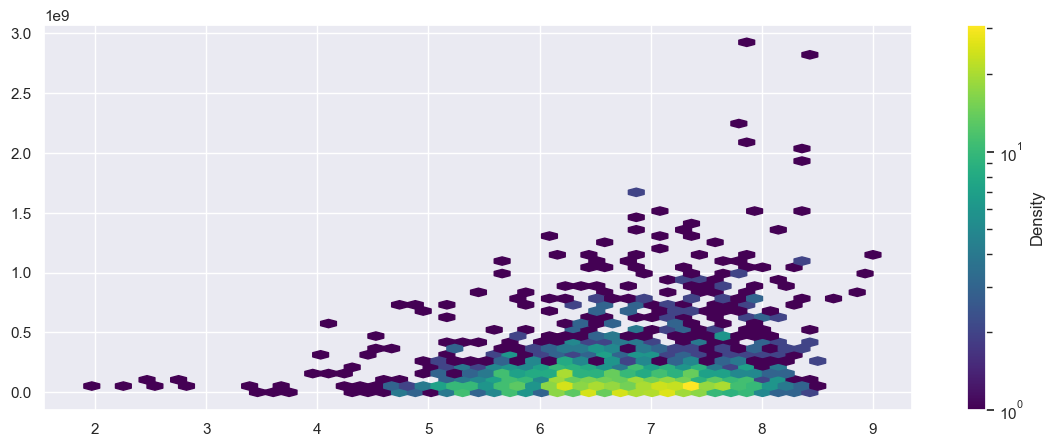

In [15]:
fig,ax = plt.subplots(figsize=(14, 5))

#plt.scatter(X_scaled[:,0],X_scaled[:,1])
hex = ax.hexbin(df_movie['Rating'],df_movie['Income'],gridsize=50,bins='log', cmap='viridis')
fig.colorbar(hex, ax=ax, label='Density')
plt.show()

**Nhận xét**
- Các phim có Rating thấp (dưới 4) thường có doanh thu cũng khá thấp.
- Các phim có Rating nằm ở khoảng trung bình (từ 5 đến 7) có khoảng doanh thu rộng hơn và cao hơn, tuy nhiên, số lượng doanh thu thấp vẫn chiếm phần nhiều.
- Các phim có Rating cao có khoảng doanh thu rộng và cao nhất, ở những khoảng doanh thu cao thì mức điểm này cũng có vẻ nhiều hơn so với các mức trước. Đặc biệt là những phim có doanh thu cao nhất đều nằm ở mức 8 điểm trở lên. Chứng tỏ là những phim có doanh thu cao đều là những phim được đánh giá tốt. Tuy nhiên điều ngược lại có vẻ không đúng khi những phim được đánh giá cao có mức tập chung nhiều ở những vùng doanh thu thấp. Những phim này có thể là phim nghệ thuật, được lòng giới phê bình nhưng lại kén người xem dẫn đén doanh thu thấp.

#### 2.3 Trường dữ liệu: Budget, Runtime

**Mục tiêu:** Thể hiện mối quan hệ giữa hai biến Budget và Runtime để xem sự tương quan của chúng

**Biểu đồ:** Scatter plot, đường.

**Nguyên nhân:**
- Dễ nhìn được sự tương quan.
- Đánh giá được xem hai biến có mối liên hệ nào không.
- Quan sát được sự phân tán dữ liệu giữa hai biến.

**Cách thực hiện:**

Lấy ra 2 cột Runtime và Budget, sau đó vẽ scatter và đường hồi quy.

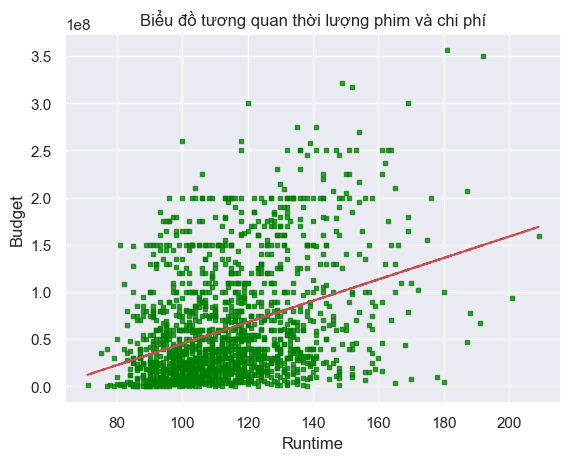

In [16]:
# Gán giá trị RunTime, Budget cho x, y 
x = df_movie.Runtime
y = df_movie.Budget

#Vẽ biểu đồ phân tán với một số thuộc tính
plt.scatter(x, y, c = 'green',s=10, alpha=0.75, marker='s')

# Vẽ đường thằng tuyến tính
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# Thêm tên cho các đối tượng
plt.title("Biểu đồ tương quan thời lượng phim và chi phí")
plt.xlabel('Runtime')
plt.ylabel('Budget')
plt.show()

**Nhận xét**
- Chọn Biểu đồ phân tán để trực quan hóa mối tương quan giữa hai trường dữ liệu Runtime và Budget (2 biến độc lập)
- Theo như biểu đồ ta thấy, đa phần các điểm tập trung vào góc dưới bên trái. Đường xu hướng theo chiều đi lên phần nào thể hiện mối nhân quả giữa thời lượng phim và chi phí phim. Có thể nói thời lượng phim dài ngắn có ảnh hưởng tới chi phí khi làm phim. Đây cũng là một điều thực tế, khi thời lượng phim ngắn, các chi phí bỏ ra cho công đoạn làm phim sẽ tốn ít hơn nếu làm phim có thời lượng dài, chi phí quay hình, chi phí cắt chụp,... đều có thể tăng lên khi phim được quay dài ra.

#### 2.4 Trường dữ liệu: Budget, Income

**Mục tiêu:** Thể hiện mối quan hệ giữa hai biến Budget và Income để xem sự tương quan của chúng

**Biểu đồ:** Scatter plot, đường.

**Nguyên nhân:**
- Dễ nhìn được sự tương quan.
- Đánh giá được xem hai biến có mối liên hệ nào không.
- Quan sát được sự phân tán dữ liệu giữa hai biến.

**Cách thực hiện:**

Đầu tiên, ta xem thử độ tương quan của hai biến này xem có cao không

In [17]:
df_movie['Income'].corr(df_movie['Budget'])

0.7415245092752566

Khá là cao, vậy nên ta thử trực quan xem nó coi nó có thực sự tốt như thế không

- Để thể hiện được độ tương quan của hai biến này, ta sẽ vẽ một đường hồi quy tuyến tính.
- Có rất nhiều cách để vẽ đường này, tuy nhiên, để làm cho thú vị, ta sẽ dùng Linear Regression để tìm ra đường này và vẽ nó.

In [18]:
from sklearn.linear_model import LinearRegression

Ta sẽ dùng model Linear Regression và train model này bằng 2 cột Budget và Income.

Sau khi train, model sẽ có dạng y=aX+b (là một đường thẳng) và đường thẳng này sẽ khớp nhất với bộ dữ liệu này. Đó chính là đường thẳng hồi quy của bộ dữ liệu.

Sau đó, ta dùng model này đưa vào cột Budget để lấy đầu ra (dựa trên đường thẳng), vậy là ta sẽ có cặp X,y để vẽ đường thẳng này.

In [19]:
X = df_movie['Budget'].values
model = LinearRegression()
model.fit(X.reshape(-1,1), df_movie['Income'].values)

y = model.predict(X.reshape(-1,1))

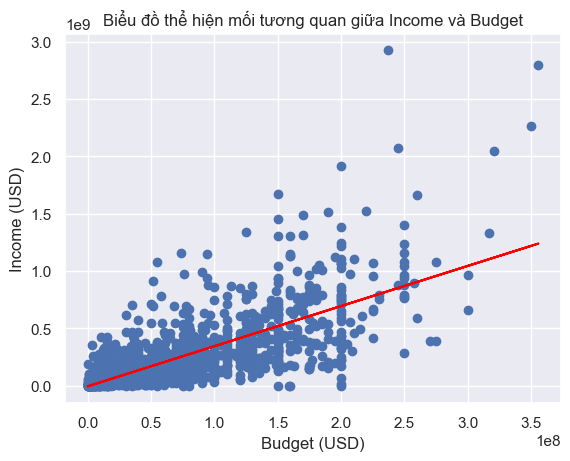

In [20]:
plt.scatter(df_movie['Budget'],df_movie['Income'])
plt.plot(X,y,color = 'red')
plt.xlabel('Budget (USD)')
plt.ylabel('Income (USD)')
plt.title('Biểu đồ thể hiện mối tương quan giữa Income và Budget')
plt.show()

**Nhận xét**
- Nhìn chung, ta có thể nhìn thấy một mối tương quan nhẹ giữa biến Budget và Income. 
- Có thể nói rằng ở những bộ phim có doanh thu cao, sự đầu tư của phim cũng là rất nhiều. Khi đầu tư nhiều vào bộ phim như chi tiền mời diễn viên nổi tiếng, quay những phân cảnh khó đòi hỏi chi phí cao, chi phí Marketing,.. thì bộ phim có khả năng mang về doanh thu cao hơn. 
- Tuy nhiên, cũng rất khó khẳng định rằng nếu ta đầu tư nhiêu thì sẽ mang lại doanh thu tốt, bằng chứng là có những bộ phim được đầu tư rất nhiều nhưng doanh thu lại thấp hơn so với kỳ vọng. Nguyên nhân có thể đến về việc chưa hiểu rõ nhu cầu thị trường, Marketing sai cách, Drama từ đoàn làm phim hoặc diễn viên, đầu tư nhiều vào phân cảnh tuy nhiên nội dung lại không hấp dẫn người xem,...

#### 2.5 Trường dữ liệu: Month, Year

**Mục tiêu:** Xem thị trường phim sản xuất phim như thế nào qua các tháng trong năm và qua từng năm

**Biểu đồ:** Heatmap

**Nguyên nhân:**
- Thể hiện được mức độ ra mắt phim của các năm trong các tháng.
- Có thể tìm được xu hướng về cường độ ra mắt phim.
- So sánh được mức độ ra mắt phim trong các tháng của các năm.

**Cách thực hiện:**


Đầu tiên ta sẽ tạo dữ liệu là một DataFrame với index là 12 tháng trong năm và cột là số lượng phim các tháng qua các năm

In [21]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month.reverse()
new_df = pd.DataFrame([], index = month)
year_min = df_movie['Year'].min()
year_max = df_movie['Year'].max()
for i in range(year_min, year_max+1):
    temp_list = []
    for j in month:
        temp_list.append(df_movie[(df_movie['Year'] == i) & (df_movie['Month'] == j)].shape[0])
    new_df[i] = temp_list

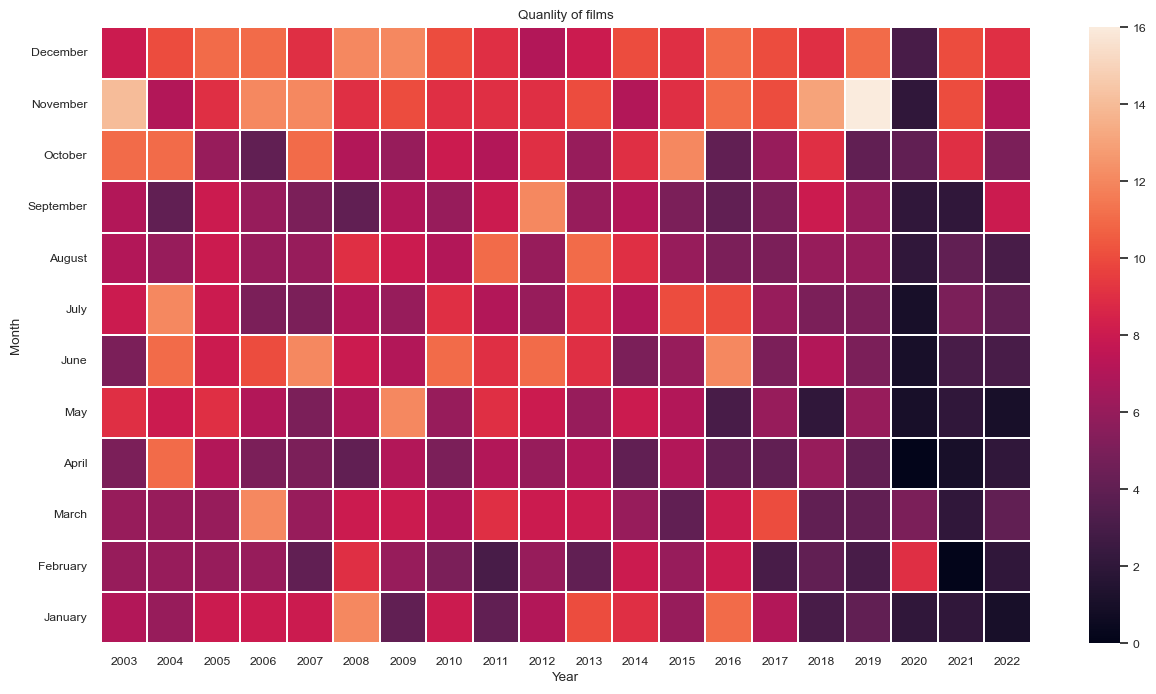

In [22]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 0.8)
sns.heatmap(new_df,linewidth=.25).set(xlabel='Year', ylabel='Month', title="Quanlity of films")
plt.show()

**Nhận xét**

- Lượng phim ra mắt trong năm có sự chêch lệch nhau về các tháng trong năm. Có vẻ từ tháng 6 đến tháng 12 thì phim được ra mắt nhiều hơn và những tháng đầu năm thì lượng phim ra mắt ít hơn. (Có lẽ là do những tháng đầu năm là những tháng cao điểm của việc làm phim)
- Lượng phim ra mắt ở các năm có vẻ không chêch lệch nhau quá nhiều.
- Đặc biệt là ở những năm gần đây (2020-2021-2022), lượng phim ra mắt bị giảm rất nhiều, có những tháng không có phim nào ra mắt. Nguyên nhân ở đây có lẽ là do dịch Covid-19 khiến cho nghành làm phim trên cả thế giới bị gián đoạn(không đi quay được và mọi người cũng không ra rạp coi được). Nhưng trong 3 năm đó vẫn có 1 vài tháng có lượng phim ra rạp khá ổn. Chắc có lẽ đây là những tháng dịch giảm ở một số quốc gia có nghành làm phim phát triển.

#### 2.6 Trường dữ liệu: Income, Country_of_origin

Ta không xem trường Title là một trường có quan hệ vì trường này thường để định doanh (mỗi phim đều có 1 tên riêng nên không có ý nghĩa)

**Mục tiêu:** Xem doanh thu các phim top 10 và xem các nước sản xuất phim đó

**Biểu đồ chọn:** Stacked Bar

**Nguyên nhân:**
- So sánh được doanh thu giữa các phim có doanh thu cao.
- Biết được xem nước nào sản xuất phim đó.

**Cách thực hiện:**

Lấy ra 10 bộ phim có doanh thu cao nhất

In [23]:
sorted_by_income = df_movie.sort_values(["Income"], ascending=[False])
income_top10 = sorted_by_income[['Title', 'Income', 'Country_of_origin']].iloc[:10]
income_top10.reset_index(inplace=True)
income_top10.drop(columns = 'index',inplace=True)

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

In [25]:
income_top10['Country_of_origin'] = income_top10['Country_of_origin'].str.split(', ')

Ta one-hot encoding cột Country_of_origin bằng MultiLabelBinarizer

In [26]:
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(income_top10['Country_of_origin'])
one_hot_df = pd.DataFrame(encoded, columns=mlb.classes_)
# Tính tổng số nước sản xuất bộ phim
one_hot_df['sum'] = one_hot_df.sum(axis = 1)
one_hot_df

,Canada,China,Japan,United Arab Emirates,United Kingdom,United States,sum
0,0,0,0,0,0,1,1
1,0,0,0,0,0,1,1
2,0,0,0,0,0,1,1
3,0,0,0,0,0,1,1
4,0,0,0,0,0,1,1
5,0,0,0,0,0,1,1
6,0,0,0,0,0,1,1
7,0,0,0,0,1,1,2
8,0,0,0,0,0,1,1
9,1,1,1,1,0,1,5


Sau đó, ta sẽ chia doanh thu cho tổng số nước, và gán giá trị đó cho các nước sản xuất phim đó. Điều này là để biểu thị nước đó trên các thanh của biểu đồ cột.

In [27]:
income_top10 = pd.concat([income_top10, one_hot_df], axis=1)
income_top10.drop(columns=['Country_of_origin'],inplace = True)
income_top10['Income'] /= income_top10['sum']
income_top10.drop(columns = 'sum', inplace= True)

In [28]:
for i in income_top10.index:
    for j in income_top10.columns[2:]:
        income_top10[j] = income_top10[j].astype(np.float64)
        if income_top10.loc[i,j] == 1:
            income_top10.loc[i,j] = income_top10.loc[i,'Income']

In [29]:
income_top10.drop(columns = 'Income',inplace = True)

In [30]:
income_top10

,Title,Canada,China,Japan,United Arab Emirates,United Kingdom,United States
0,Avatar,0.0,0.0,0.0,0.0,0.0,2.922918e+09
1,Avengers: Endgame,0.0,0.0,0.0,0.0,0.0,2.797501e+09
2,Avatar: The Way of Water,0.0,0.0,0.0,0.0,0.0,2.267947e+09
3,Star Wars: Episode VII - The Force Awakens,0.0,0.0,0.0,0.0,0.0,2.069522e+09
4,Avengers: Infinity War,0.0,0.0,0.0,0.0,0.0,2.048360e+09
5,Spider-Man: No Way Home,0.0,0.0,0.0,0.0,0.0,1.917430e+09
6,Jurassic World,0.0,0.0,0.0,0.0,0.0,1.671537e+09
7,The Lion King,0.0,0.0,0.0,0.0,831625243.5,8.316252e+08
8,The Avengers,0.0,0.0,0.0,0.0,0.0,1.518816e+09
9,Furious 7,303068279.8,303068279.8,303068279.8,303068279.8,0.0,3.030683e+08


Ta trực quan dữ liệu (sử dụng stacked bar để biểu diễn nước)

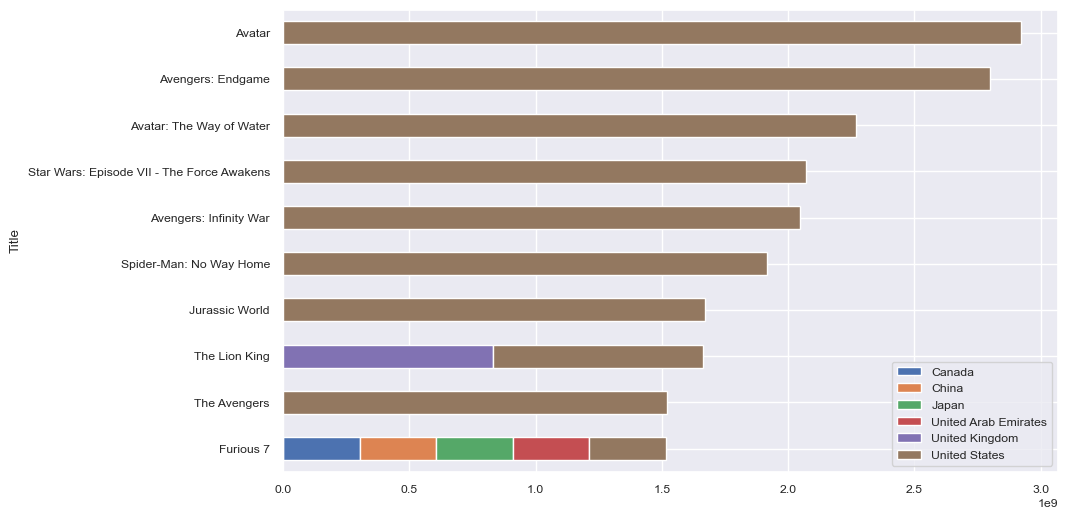

In [31]:
ax = income_top10[::-1].plot.barh(x='Title', stacked=True, figsize=(10,6))
plt.show()

**Nhận xét**
- Theo biểu đồ trên, Avatar là bộ phim thu về doanh thu cao nhất với gần 3 triệu USD. Tiếp đến là Avengers: Endgame với 2.8 triệu USD. Avatar: The Way of Water giữ vị trí thứ 3. Các bộ phim còn lại trong top 10 có thể kể đến như Star Wars: Episode VII - The Force Awakens, Avengers: Infinity War, Spider-Man: No Way Home, Jurassic World, The Lion King, The Avengers, Furious 7.

- Các phim đoạt mức doanh thu cao nhất đều đến từ Mỹ. Như vậy có thể thấy Mỹ đang là quốc gia dẫn đầu và chiếm thế độc tôn trong danh sách các bộ phim ăn khách nhất từ 2003 đến 2022.

## 3. Quan hệ nhiều trường (3 trở lên)

#### 3.1 Trường dữ liệu: Year, Genre và Rating

**Mục tiêu:** Tìm hiểu, quan sát và nhận xét về xu hướng, chất lượng và điểm đánh giá trung bình của từng thể loại phim qua từng năm

**Biểu đồ:** Heat map

**Nguyên nhân:**
- So sánh được tương quan giữa nhiều trường dữ liệu với nhau, cụ thể là 3 trường Year, Genre và Rating.
- Xem và hiểu nhanh số lượng lớn dữ liệu ở dạng trực quan.
- Giúp nhấn mạnh các dữ liệu quan trọng, dễ dàng nhận ra được xu hướng xem phim và làm phim theo thể loại qua từng năm.

**Cách thực hiện:**

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars



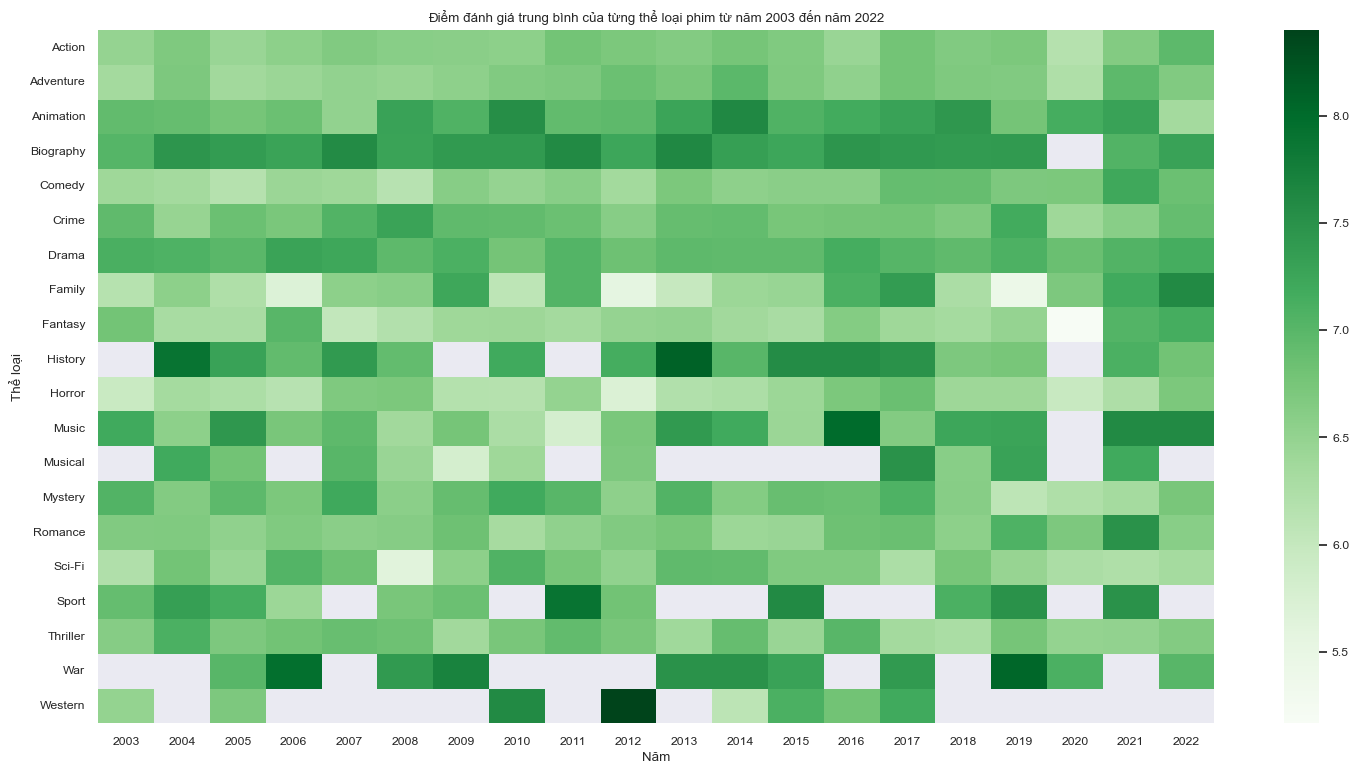

In [32]:
# Tạo unique_genres lưu danh sách thể loại và danh sách số lượng phim mỗi thể loại
genre_arr = np.concatenate(np.array(df_movie["Genre"].str.split(', ')))
unique_genres, genre_counts = np.unique(genre_arr, return_counts=True)

# Tạo danh sách các năm từ 2003 đến 2022
unique_years = np.unique(df_movie["Year"], return_counts=False)

# tạo ma trận (bảng) lưu rating trung bình của từng thể loại qua từng năm
# mỗi dòng ứng với từng thể loại
# mỗi cột ứng với từng năm
avg_rating_matrix = []
for unique_genre in unique_genres:

    # tạo avg_rating lưu rating trung bình của thể loại "unique_genre" từ 2003 - 2022
    avg_rating = []
    for unique_year in unique_years:
        
        # tạo rating_list lưu rating của thể loại "unique_genre" từ 2003 - 2022
        rating_list = []
        
        # duyệt từng dòng dữ liệu, lấy rating, genre và year của từng phim để xét
        for rating, genre, year in zip(df_movie["Rating"], df_movie["Genre"], df_movie["Year"]):

            if (unique_genre in genre) and (unique_year == year):
                rating_list.append(rating)
       
        # tính trung bình các rating trong rating_list
        # thêm rating trung bình vào avg_rating
        avg_rating.append(np.mean(rating_list))  
         
    # thêm avg_rating vào avg_rating_matrix
    avg_rating_matrix.append(avg_rating)

# vẽ biểu đồ với dữ liệu là bảng rating trung bình của từng thể loại từ 2003 - 2022
# trục x là các năm, trục y là các thể loại
df_visual = pd.DataFrame(avg_rating_matrix, unique_genres, unique_years)
df_visual
plt.figure(figsize=(18,9))
sns.heatmap(df_visual, cmap = "Greens")
plt.title("Điểm đánh giá trung bình của từng thể loại phim từ năm 2003 đến năm 2022")
plt.xlabel("Năm")
plt.ylabel("Thể loại")
plt.rc('font', size=16)
plt.show()

**Nhận xét**
- Qua quan sát, các bộ phim xuất hiện trong danh sách tập trung chủ yếu ở các thể loại Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Family, Horror, Mystery, Romance, Sci-Fi và Thriller. Có thể thấy những thể loại này là những thể loại phim thịnh hành, luôn nằm trong top 100 bộ phim được đánh giá cao của năm, từ 2003 đến 2022.

- Các thể loại phim như Musical, Sport, War, Western có những năm biến mất khỏi danh sách, có năm trở lại danh sách với điểm đánh giá trung bình khá cao (từ 7.0 đến 8.0).

- Xét về điểm đánh giá trung bình của từng thể loại qua các năm, thể loại Animation, Biography và Music luôn có điểm đánh giá trung bình cao hơn các thể loại khác (trên 7.0).

- Năm 2005, các bộ phim phân bố rating đồng đều nhất trên danh sách về mặt thể loại. Ngược lại, năm 2020, các bộ phim phân bố rating không đồng đều nhất, cụ thể các thể loại Biography, Fantasy, History, Music, Musical, Sport, Western, Horror bị loại khỏi danh sách.

- Các năm 2021, 2022, các thể loại phim có trong danh sách đạt rating khá cao, đa số lớn hơn 6.5, nhiều thể loại phim đạt rating hơn 7.0.

- Chất lượng phim của thể loại Animation, Biography, Family, Music ngày càng được đánh giá cao. Ngược lại, chất lượng phim của thể loại Western ngày càng được đánh giá thấp và biến mất khỏi danh sách.

#### 3.2 Trường dữ liêu: Income, Budget và Genre

**Mục tiêu:** Xem lợi nhuận, Budget và Income của các thể loại phim

**Biểu đồ:** Multibar(Budget, Income), đường (profit)

**Nguyên nhân:**
- So sánh được Budget và Income của một thể loại phim và lợi nhuận các thể loại phim khác nhau.
- Biết và so sánh được quy mô đầu tư và quy mô doanh thu của các thể loại phim.

**Cách thực hiện:**

Đầu tiên, ta sẽ lấy các loại phim và số lượng phim của các thể loại. Sau đó chọn ra top 10 loại phim có số lượng cao nhất.

In [33]:
arr = np.concatenate(np.array(df_movie["Genre"].str.split(', ')))
unique_values, value_counts = np.unique(arr, return_counts=True)
dic = {}
for value, count in zip(unique_values, value_counts):
    dic[value] = count
dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=True))
top_10_genre = list(dic.keys())[:10]

Tiếp đến, ta sẽ tạo DataFrame để lưu tổng Budget và Income của từng thể loại phim.

In [34]:
dic_10_genre_budge_income_agr = pd.DataFrame([],columns=['Budget', 'Income'])
for i in top_10_genre:
    df_temp = df_movie[df_movie["Genre"].apply(lambda x: i in x.split(', '))]
    dic_10_genre_budge_income_agr.loc[i,'Budget'] = int(df_temp['Budget'].mean())
    dic_10_genre_budge_income_agr.loc[i,'Income'] = int(df_temp['Income'].mean())

Để thấy được lượng kinh phí trung bình (Budget) và doanh thu trung bình (Income) ta sẽ sử dụng biểu đồ bar để vẽ 2 trường dữ liệu trên. Đồng thời, ta sẽ dùng line chart để vẽ lợi thuận trung thu được của các thể loại phim (Genrce) phim.

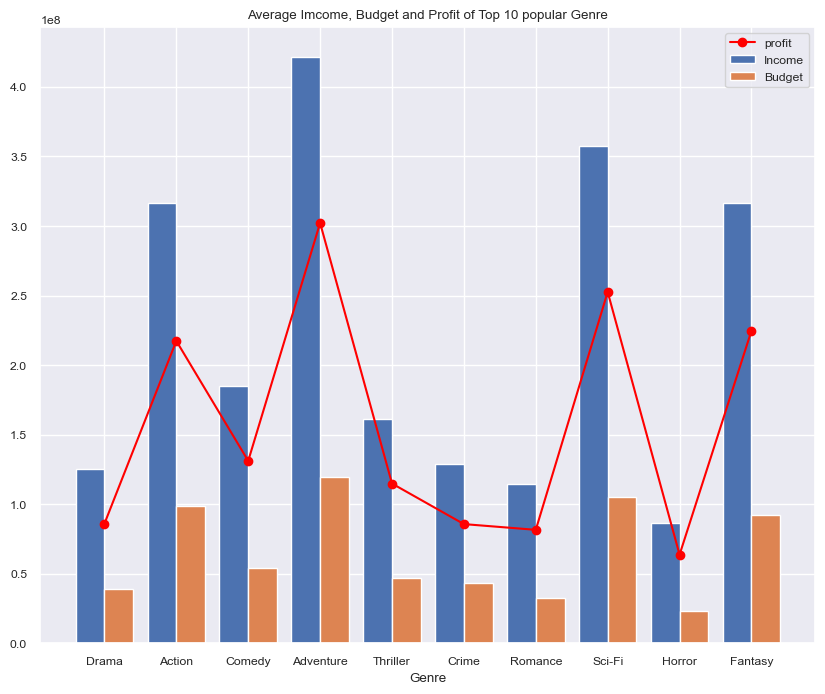

In [35]:
axis = np.arange(len(dic_10_genre_budge_income_agr.index))
plt.figure(figsize=(10,8)) 
plt.bar(axis - 0.2, dic_10_genre_budge_income_agr['Income'], 0.4, label = 'Income')
plt.bar(axis + 0.2, dic_10_genre_budge_income_agr['Budget'], 0.4, label = 'Budget')
plt.plot(axis ,dic_10_genre_budge_income_agr['Income'] - dic_10_genre_budge_income_agr['Budget'], marker='o', color='red', label='profit')
plt.xticks(axis, dic_10_genre_budge_income_agr.index)
plt.xlabel("Genre")
plt.title("Average Imcome, Budget and Profit of Top 10 popular Genre")
plt.legend()
plt.show()

**Nhận xét**
- Kinh phí (Budget) và doanh thu (Income) tỉ lệ thuận với nhau. Dẫn đến những loại phim có kinh phí cao thường có doanh thu lớn (điều này có thể do thể loại phim đó đầu tư nhiều hơn sẽ chất lương và hay hơn, hoặc cũng có thể các nhà làm phim thấy được lợi thuận lớn mà loại phim đó mang lại nên đầu tư nhiều hơn).
- Các loại phim có kinh phí cũng như doanh thu cao nhất là Adventure, Sci-Fi, Action, Fantasy. Những thể loại phim này đều là những phim rất phổ biến và được mọi người ưa chuộng. Đồng thời cũng là những loại phim tốn nhiều kinh phí để thực hiện nhất

#### 3.3 Trường dữ liêu: Year, Genre, Title và Income

**Mục tiêu:** Thể hiện tỷ trọng theo các năm, theo các thể loại và phim của doanh thu

**Biểu đồ:** Sunburst

**Nguyên nhân:**
- Nó thể hiện được sự phân cấp theo từng bậc năm, thể loại, tên phim
- Nó cũng thể hiện được tỷ trọng theo doanh thu của các năm và các thể loại

**Cách thực hiện:**

Đầu tiên, ta cần chia các thể loại ra theo dòng

In [36]:
temp_df = df_movie[['Year', 'Genre', 'Title', 'Income']]

temp_df['Genre'] = temp_df['Genre'].str.split(', ')
temp_df = temp_df.explode('Genre')


C:\Users\HP\AppData\Local\Temp\ipykernel_1840\1464372949.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Sau đó, dùng thư viện plotly để vẽ.

In [37]:
burst = px.sunburst(temp_df, 
                    path=['Year', 'Genre', 'Title'], 
                    values='Income',
                    width=1100, 
                    height=1100
                    )

burst.show()

Vì đây là biểu đồ động nên không thể ghi lên github hay vào file. Vậy ta sẽ hiển thị tạm ảnh tĩnh của nó.

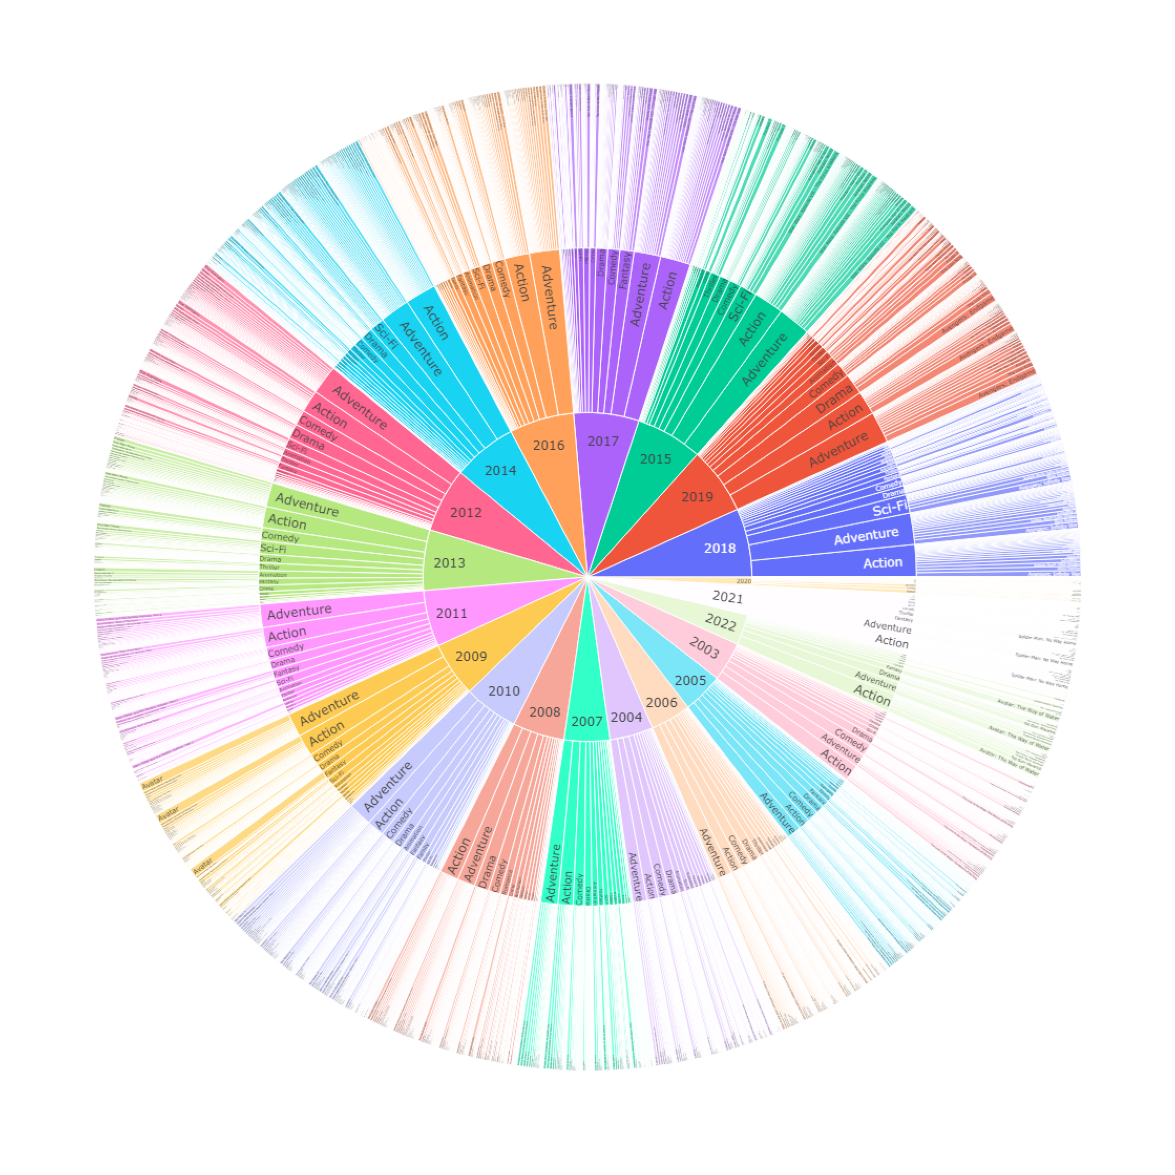

In [48]:
import matplotlib.image as mpimg
image = mpimg.imread("sunburst.png")
plt.figure(figsize=(15,15))
imgplot = plt.imshow(image)
plt.axis('off')
plt.show()

**Nhận xét**
- Từ biểu đồ này, ta có thể thấy sự tỷ trọng doanh thu của các năm khá là đồng đều nhau, riêng chỉ có năm 2020 - năm đại dịch Covid bùng nổ thì doanh thu lại vô cùng thấp. Nguyên nhân khá dễ hiểu khi năm này mọi người phải thực hiện cách ly, hoạt động giải trí như rạp chiếu phim bị đóng cửa.
- Các thể loại phim như Action, Adventure, Comedy, Drama là những thể loại chiếm doanh số cao nhất trong các năm. Đây là những thể loại được sản xuất khá  nhiều và cũng được công chúng yêu thích.
- Những bộ phim có doanh thu cao nhất đều có hai thể loại đó là Adventure và Action, chứng tỏ đây là những thể loại được yêu thích nhất, có thể vì những phân cảnh hành động hoành tráng hay những là cốt truyện về hành trình của phim vô cùng thú vị và hấp dẫn.

### Lấy file requirements.txt

In [39]:
!pip freeze > requirements.txt